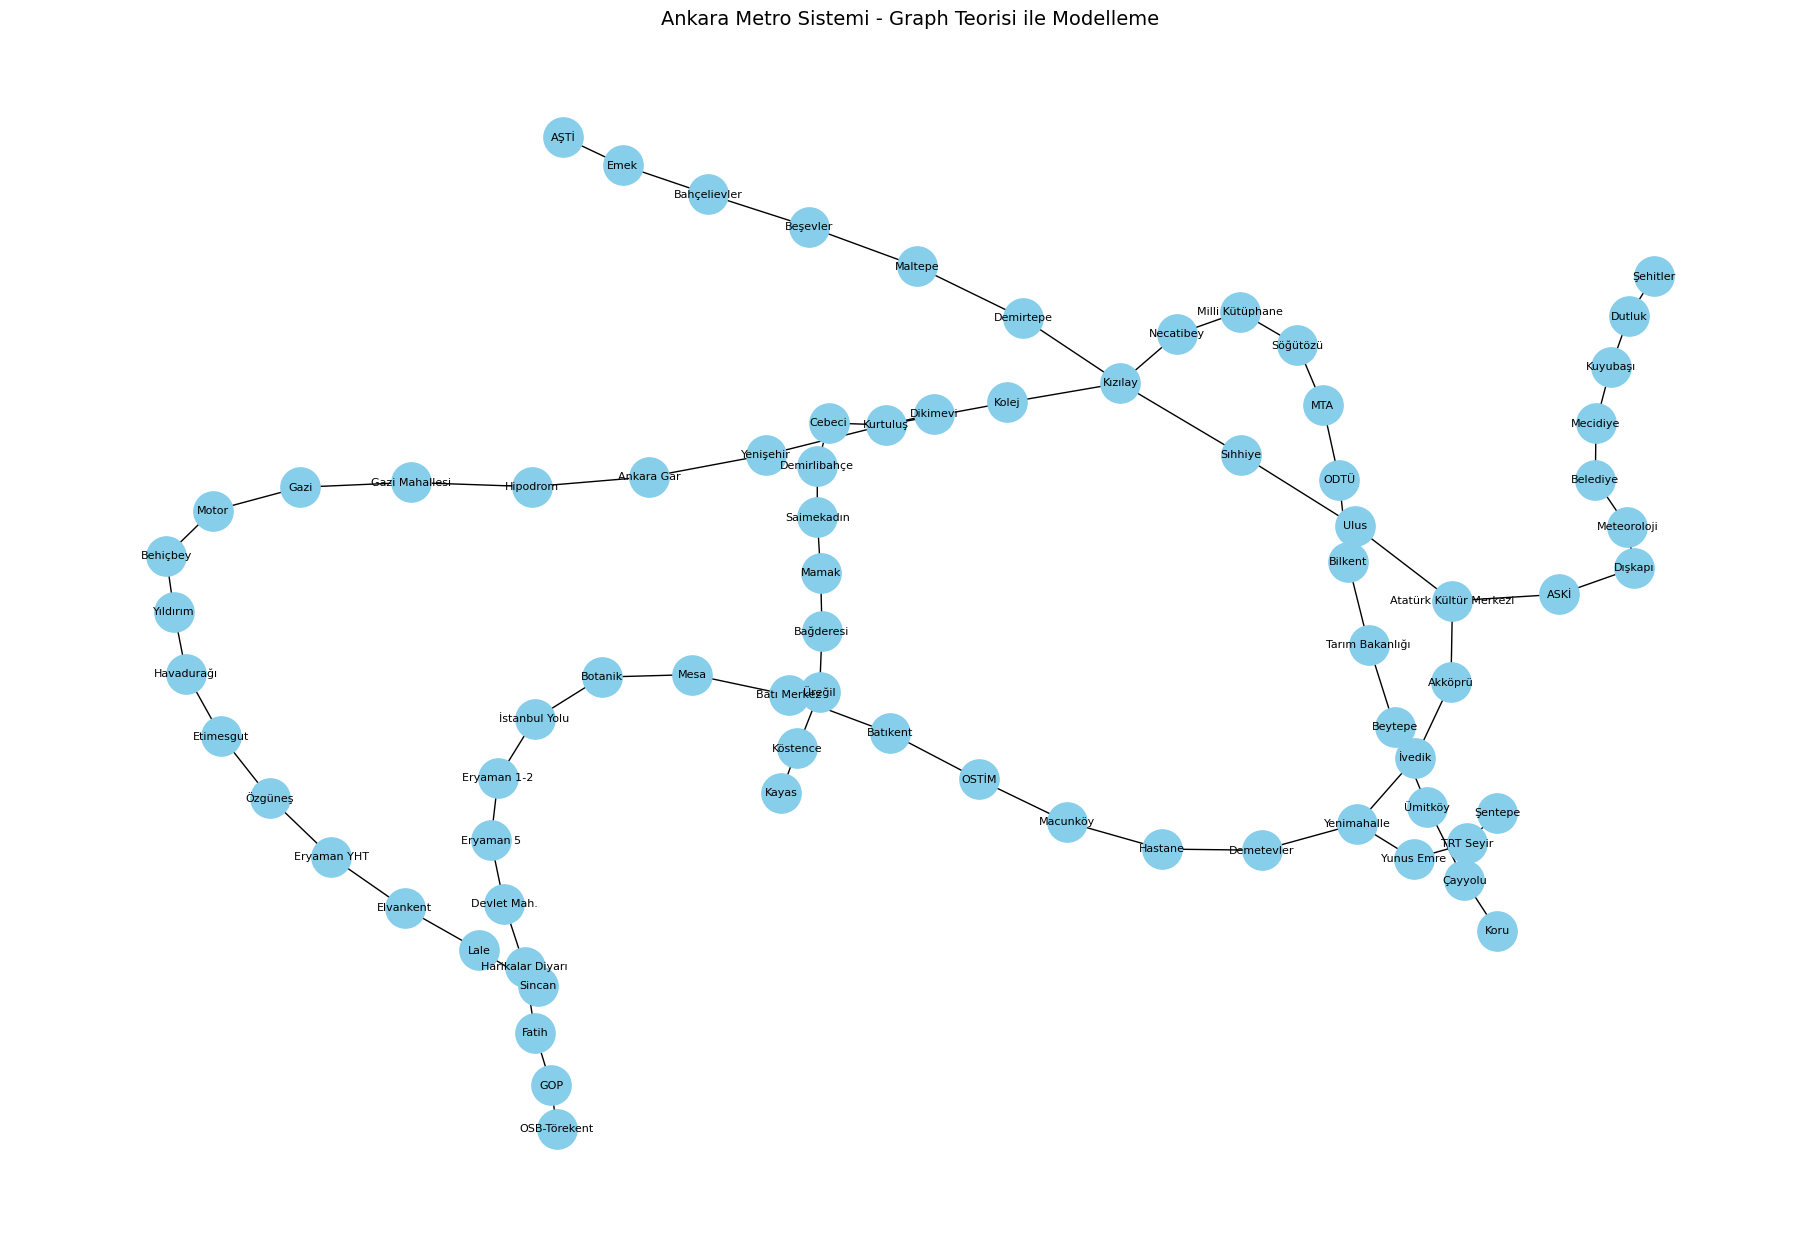

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

# Hatlardaki duraklar
A1 = ["AŞTİ", "Emek", "Bahçelievler", "Beşevler", "Maltepe", "Demirtepe", "Kızılay", "Kolej", "Kurtuluş", "Dikimevi"]
M1 =  ["Kızılay", "Sıhhiye", "Ulus", "Atatürk Kültür Merkezi", "Akköprü", "İvedik", "Yenimahalle", "Demetevler", "Hastane", "Macunköy", "OSTİM", "Batıkent"]
M2 = ["Kızılay", "Necatibey", "Milli Kütüphane", "Söğütözü", "MTA", "ODTÜ", "Bilkent","Tarım Bakanlığı", "Beytepe", "Ümitköy", "Çayyolu", "Koru"]
M3 = ["Batıkent", "Batı Merkez", "Mesa", "Botanik", "İstanbul Yolu", "Eryaman 1-2", "Eryaman 5", "Devlet Mah.", "Harikalar Diyarı", "Fatih","GOP", "OSB-Törekent"]
M4 = ["Atatürk Kültür Merkezi", "ASKİ", "Dışkapı", "Meteoroloji", "Belediye", "Mecidiye", "Kuyubaşı", "Dutluk", "Şehitler"]
BAŞKENTRAY = ["Sincan", "Lale", "Elvankent", "Eryaman YHT", "Özgüneş", "Etimesgut", "Havadurağı", "Yıldırım", "Behiçbey", "Motor", "Gazi", "Gazi Mahallesi", "Hipodrom", "Ankara Gar","Yenişehir", "Kurtuluş", "Cebeci", "Demirlibahçe", "Saimekadın", "Mamak", "Bağderesi", "Üreğil", "Köstence", "Kayas"]
T1 = ["Yenimahalle", "Yunus Emre", "TRT Seyir", "Şentepe"]

# Graf oluştur
G = nx.Graph()

# Hat bağlantılarını ekleyen fonksiyon
def add_line(line):
    for i in range(len(line) - 1):
        G.add_edge(line[i], line[i + 1])

# Hatları graf'a ekle
for line in [A1, M1, M2, M3, M4, BAŞKENTRAY, T1]:
    add_line(line)

# Görselleştirme
plt.figure(figsize=(18, 12))
nx.draw(G, with_labels=True, node_color="skyblue", node_size=800, font_size=8)
plt.title("Ankara Metro Sistemi - Graph Teorisi ile Modelleme", fontsize=14)
plt.show()


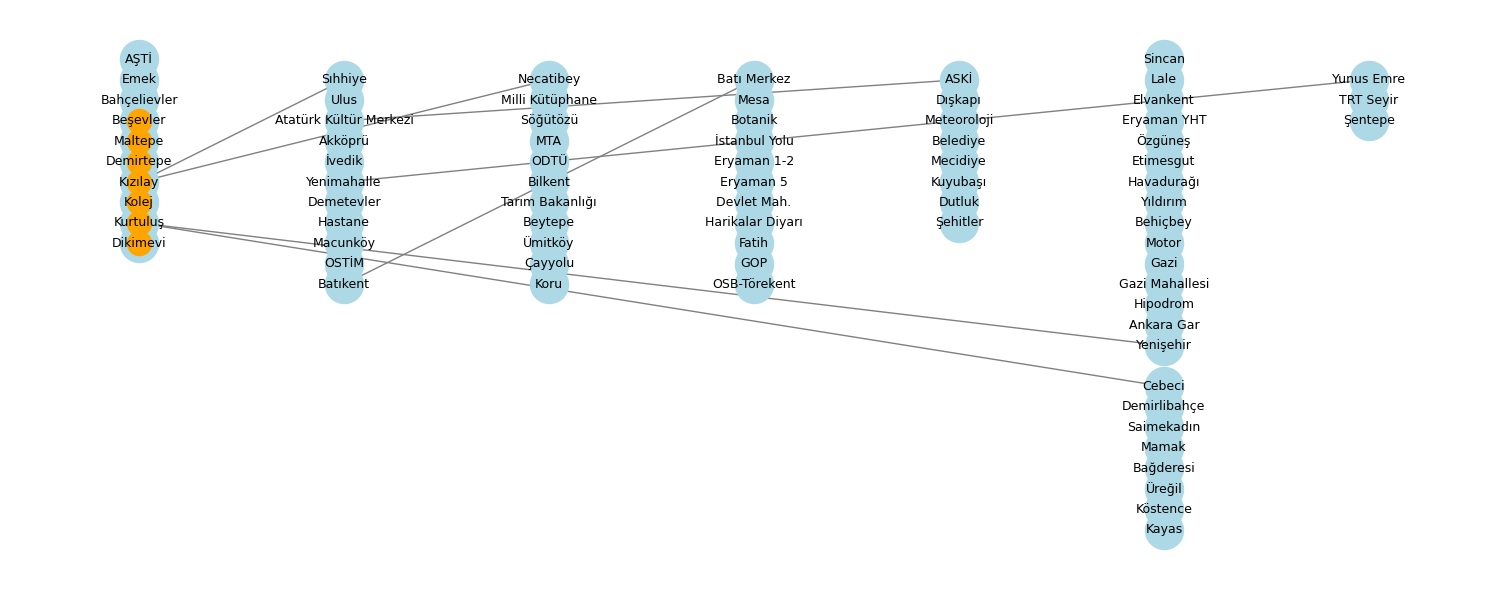

In [52]:
import tkinter as tk
from tkinter import ttk
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


hatlar = {
    "A1": ["AŞTİ", "Emek", "Bahçelievler", "Beşevler", "Maltepe", "Demirtepe", "Kızılay", "Kolej", "Kurtuluş", "Dikimevi"],
    "M1": ["Kızılay", "Sıhhiye", "Ulus", "Atatürk Kültür Merkezi", "Akköprü", "İvedik", "Yenimahalle", "Demetevler", "Hastane", "Macunköy", "OSTİM", "Batıkent"],
    "M2": ["Kızılay", "Necatibey", "Milli Kütüphane", "Söğütözü", "MTA", "ODTÜ", "Bilkent","Tarım Bakanlığı", "Beytepe", "Ümitköy", "Çayyolu", "Koru"],
    "M3": ["Batıkent", "Batı Merkez", "Mesa", "Botanik", "İstanbul Yolu", "Eryaman 1-2", "Eryaman 5", "Devlet Mah.", "Harikalar Diyarı", "Fatih","GOP", "OSB-Törekent"],
    "M4": ["Atatürk Kültür Merkezi", "ASKİ", "Dışkapı", "Meteoroloji", "Belediye", "Mecidiye", "Kuyubaşı", "Dutluk", "Şehitler"],
    "BAŞKENTRAY": ["Sincan", "Lale", "Elvankent", "Eryaman YHT", "Özgüneş", "Etimesgut", "Havadurağı", "Yıldırım", "Behiçbey", "Motor", "Gazi", "Gazi Mahallesi", "Hipodrom", "Ankara Gar","Yenişehir", "Kurtuluş", "Cebeci", "Demirlibahçe", "Saimekadın", "Mamak", "Bağderesi", "Üreğil", "Köstence", "Kayas"],
    "T1": ["Yenimahalle", "Yunus Emre", "TRT Seyir", "Şentepe"]
}


G = nx.Graph()
for hat in hatlar.values():
    for i in range(len(hat) - 1):
        G.add_edge(hat[i], hat[i + 1])


def sabit_konumlar_sutun(hatlar_dict):
    pos = {}
    x_step = 10
    y_step = -2
    x = 0
    for hat in hatlar_dict.values():
        for i, durak in enumerate(hat):
            if durak not in pos:
                pos[durak] = (x, i * y_step)
        x += x_step
    return pos


def en_kisa_yol(graf, kaynak, hedef):
    try:
        yol = nx.shortest_path(graf, source=kaynak, target=hedef)
        return yol, len(yol) - 1
    except nx.NetworkXNoPath:
        return None, None

# Arayüz
root = tk.Tk()
root.title("Ankara Metro - Rota ve Harita")
root.state('zoomed') 

frame = ttk.Frame(root)
frame.pack(pady=20)

ttk.Label(frame, text="Başlangıç Durağı:").grid(row=0, column=0, padx=5, pady=5)
ttk.Label(frame, text="Varış Durağı:").grid(row=1, column=0, padx=5, pady=5)

duraklar = sorted(G.nodes())
start_var = tk.StringVar()
end_var = tk.StringVar()
start_combo = ttk.Combobox(frame, textvariable=start_var, values=duraklar, width=30)
end_combo = ttk.Combobox(frame, textvariable=end_var, values=duraklar, width=30)
start_combo.grid(row=0, column=1, padx=5, pady=5)
end_combo.grid(row=1, column=1, padx=5, pady=5)


output = tk.Text(root, height=4, width=100)
output.pack(pady=5)


fig, ax = plt.subplots(figsize=(15, 10))
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)


def harita_ciz(graf, yol=None):
    ax.clear()
    pos = sabit_konumlar_sutun(hatlar)
    nx.draw(graf, pos, with_labels=True, node_color='lightblue',
            edge_color='gray', node_size=750, font_size=9, ax=ax)

    if yol:
        path_edges = list(zip(yol[:-1], yol[1:]))
        nx.draw_networkx_nodes(graf, pos, nodelist=yol, node_color='orange', ax=ax)
        nx.draw_networkx_edges(graf, pos, edgelist=path_edges, edge_color='red', width=3, ax=ax)

    canvas.draw()


def rota_goster():
    kaynak = start_var.get()
    hedef = end_var.get()
    output.delete(1.0, tk.END)

    if kaynak not in G.nodes or hedef not in G.nodes:
        output.insert(tk.END, "Lütfen geçerli iki durak seçin.")
        return

    yol, uzunluk = en_kisa_yol(G, kaynak, hedef)
    if yol:
        sure = uzunluk * 2.5 # Ortalama 2.5 dakika/durak
        output.insert(tk.END, f"{kaynak} → {hedef} arası en kısa yol ({uzunluk} durak / yaklaşık {sure} dk):\n")
        output.insert(tk.END, " → ".join(yol))
        harita_ciz(G, yol)
    else:
        output.insert(tk.END, f" {kaynak} → {hedef} arasında yol bulunamadı.")
        
def komsuluk_matrisi_goster():
    matris = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
    duraklar = sorted(G.nodes())

    pencere = tk.Toplevel(root)
    pencere.title("Komşuluk Matrisi")

    text_widget = tk.Text(pencere, wrap=tk.NONE, font=("Courier", 9))
    text_widget.pack(fill=tk.BOTH, expand=True)

   
    baslik = "     " + "  ".join([f"{d[:4]:4}" for d in duraklar]) + "\n"
    text_widget.insert(tk.END, baslik)
    text_widget.insert(tk.END, "-" * len(baslik) + "\n")

   
    for i, satir in enumerate(matris):
        satir_str = "  ".join(str(int(v)) for v in satir)
        text_widget.insert(tk.END, f"{duraklar[i][:4]:4} {satir_str}\n")


ttk.Button(frame, text="Rota Göster", command=rota_goster).grid(row=2, column=0, columnspan=2, pady=10)
ttk.Button(frame, text="Komşuluk Matrisini Göster", command=komsuluk_matrisi_goster).grid(row=3, column=0, columnspan=2, pady=10)


harita_ciz(G)

root.mainloop()
